In [1]:
from exp.nb_DatasetManager import DatasetManager
from exp.nb_Tesis import *

In [34]:
dm = DatasetManager('2019','train_images',448,300)

In [35]:
dm.generate_dataset()

Pruning the dataset
here
resizing to 448 into 2019_train_images_resized_to_448_picked_300


PosixPath('2019_train_images_resized_to_448_picked_300')

In [27]:
def reload_dataset(imgs_folder):
    random_seed(1,True)
    tfms = get_transforms(flip_vert=True, max_rotate=180,max_zoom=1.8, max_lighting=.3,p_affine=1, max_warp=0)

    data = ImageList.from_folder(imgs_folder)\
    .split_by_rand_pct()\
    .label_from_func(dm.get_label_for_image_path)\
    .transform(tfms,size=448)\
    .databunch(bs=64)\
    .normalize()
    return data

data = reload_dataset(dm.get_dataset_path())

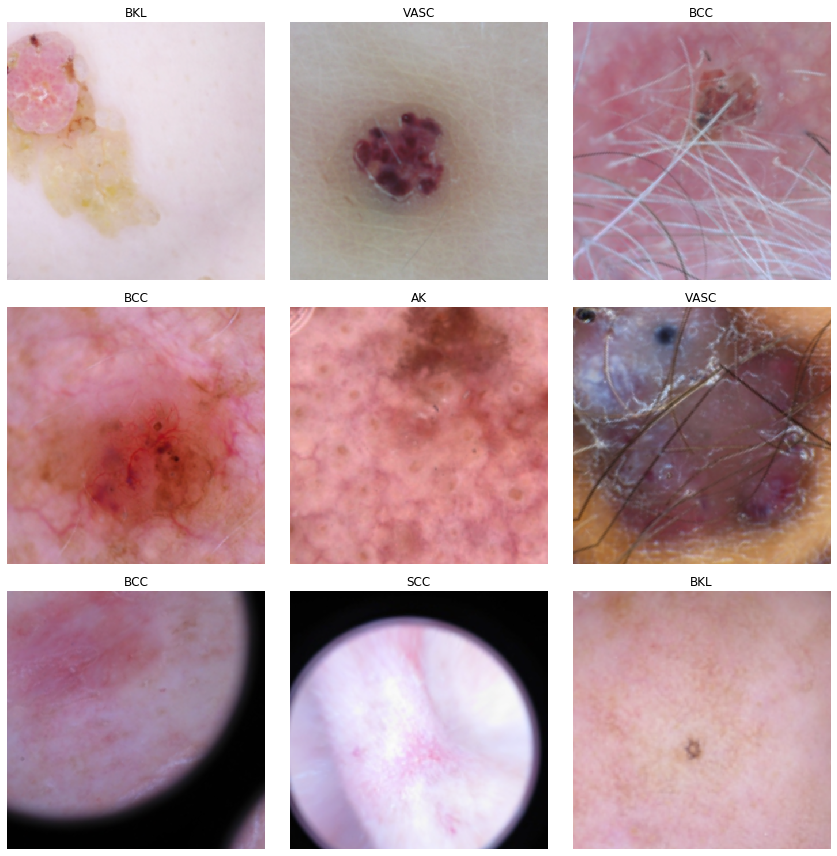

In [28]:
data.show_batch(3)

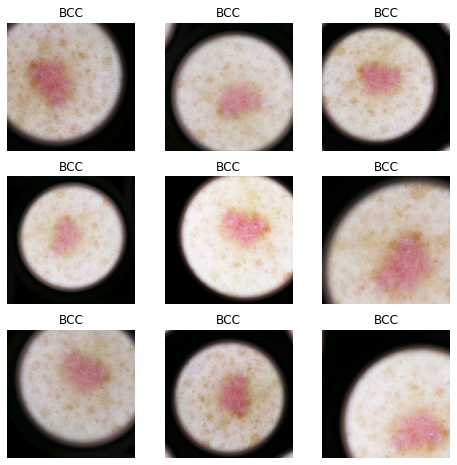

In [29]:
def _plot(i,j,ax):
    x,y = data.train_ds[1]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [30]:
train_count,valid_count = pd.value_counts(data.train_ds.y.items),pd.value_counts(data.valid_ds.y.items)
train_count.index,valid_count.index = [data.classes[i] for i in train_count.index],[data.classes[i] for i in valid_count.index]

print('train_count: \n',train_count,'\n\n','valid_count: \n', valid_count)
print('ratios:')
print(valid_count / train_count, '%')

train_count: 
 MEL     245
SCC     241
NV      241
AK      239
BCC     234
BKL     230
VASC    207
DF      197
dtype: int64 

 valid_count: 
 BKL     70
BCC     66
AK      61
SCC     59
NV      59
MEL     55
VASC    46
DF      42
dtype: int64
ratios:
AK      0.255230
BCC     0.282051
BKL     0.304348
DF      0.213198
MEL     0.224490
NV      0.244813
SCC     0.244813
VASC    0.222222
dtype: float64 %


In [31]:
ActivationStats

fastai.callbacks.hooks.ActivationStats

In [32]:
learner = cnn_learner(data,models.resnet34,
                      callback_fns=partial(ActivationsHistogram,hMin=-12,hMax=12), metrics=[accuracy])

epoch,train_loss,valid_loss,accuracy,time
0,2.913852,2.162601,0.358079,00:19
1,2.470137,1.806095,0.384279,00:18
2,2.147307,1.631825,0.443231,00:17


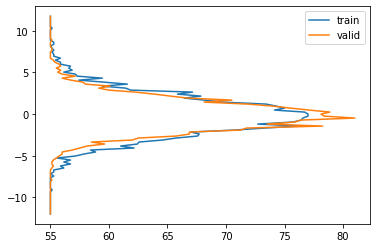

In [33]:
learner.fit_one_cycle(3)

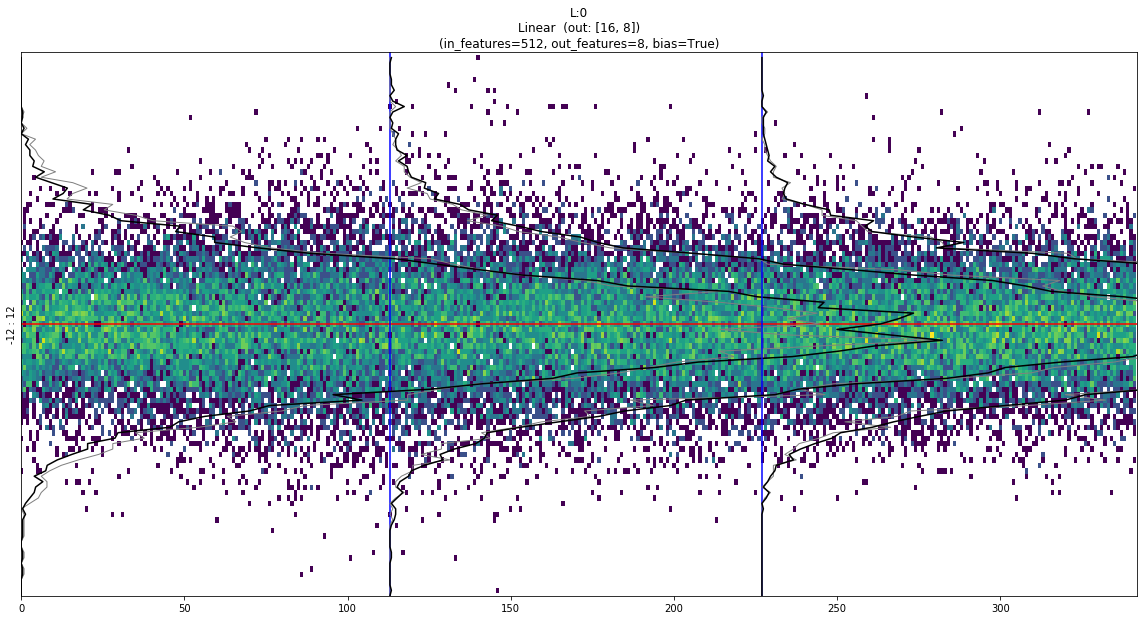

In [26]:
learner.activations_histogram.plotActsHist(hScale=50, showLayerInfo=True)
